In [ ]:
# import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Implementing the intensity transformation

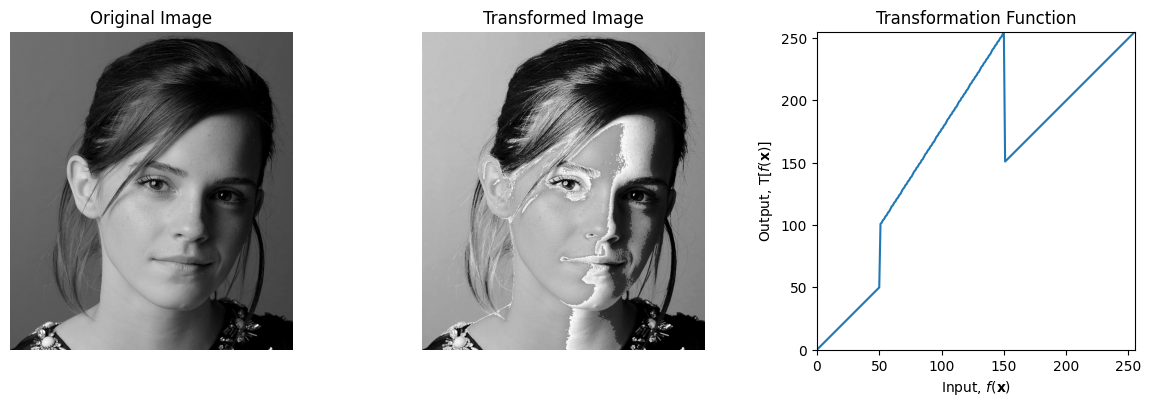

In [32]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 0], c[0, 1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')
im = cv.imread("a1images\\a1images\\emma.jpg", cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(cv.LUT(im, transform), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Transformed Image')

ax[2].plot(transform)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()